<a href="https://colab.research.google.com/github/Krit03W/AI-Learning/blob/main/Workshop6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 6



In [2]:
!wget https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_test.csv
!wget https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_train.csv

--2024-06-24 07:25:33--  https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508888 (497K) [text/plain]
Saving to: ‘movie_review_th_test.csv’

movie_review_th_tes 100%[===================>] 496.96K  --.-KB/s    in 0.06s   

2024-06-24 07:25:33 (7.82 MB/s) - ‘movie_review_th_test.csv’ saved [508888/508888]

--2024-06-24 07:25:33--  https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respo

In [3]:
!pip install pythainlp[full]
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install wordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 31.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# อ่าน Train Test Dataset

In [4]:
import pandas as pd


df_train = pd.read_csv('movie_review_th_train.csv')
df_test = pd.read_csv('movie_review_th_test.csv')

In [5]:
print(df_train.shape)
print(df_test.shape)

(1500, 37)
(300, 37)


In [6]:
df_test

,Unnamed: 0,Title,Year,Genres,IMDB ID,Runtime,Director,Writers,Cast,Summary_th,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,Uncategorized,War,Western,Quality
0,1506,The Chronicles of Riddick,2004,Action|Adventure|Sci-Fi|Thriller,tt0296572,119,David Twohy,Jim Wheat,Judi Dench|Vin Diesel,Riddick ตอนนี้เป็นชายตามล่าหาตัวเองในช่วงกลางข...,...,0,0,0,1,0,1,0,0,0,1
1,1507,The Chronicles of Narnia: The Voyage of the Da...,2010,Action|Adventure|Family|Fantasy,tt0980970,113,Michael Apted,Christopher Markus,Ben Barnes|Skandar Keynes,Lucy และ Edmund Pevensie ติดอยู่ในเคมบริดจ์อาศ...,...,0,0,0,0,0,0,0,0,0,0
2,1508,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Action|Adventure|Family|Fantasy,tt0363771,143,Andrew Adamson,Ann Peacock,Georgie Henley|Tilda Swinton,เด็กสี่คนจากครอบครัวเดียวกันต้องออกจากเมืองเพร...,...,0,0,0,0,0,0,0,0,0,1
3,1509,The Chronicles of Narnia: Prince Caspian,2008,Action|Adventure|Family|Fantasy,tt0499448,150,Andrew Adamson,Andrew Adamson,Ben Barnes|Skandar Keynes,หนึ่งปีผ่านไปตั้งแต่เด็ก Pevensie ก้าวผ่านตู้เ...,...,0,0,0,0,0,0,0,0,0,0
4,1510,The Christmas Candle,2013,Action|Drama|Family,tt2739338,100,John Stephenson,Max Lucado,Hans Matheson|Samantha Barks,ลึกล้ำในใจกลางของชนบทอังกฤษอยู่ที่หมู่บ้านที่ม...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1801,Prometheus,2012,Action|Adventure|Mystery|Sci-Fi,tt1446714,124,Ridley Scott,Jon Spaihts,Logan Marshall-Green|Noomi Rapace,เบาะแสต่อไปนี้กับที่มาของมนุษยชาติทีมพบโครงสร้...,...,0,0,0,1,0,0,0,0,0,1
296,1802,Project X,2012,Action|Comedy|Crime|Drama,tt1636826,88,Nima Nourizadeh,Matt Drake,Oliver Cooper|Thomas Mann,มันเป็นวันเกิดครบรอบ 17 ปีของโทมัสกับและสิ่งที...,...,0,0,0,0,0,0,0,0,0,1
297,1803,Project Almanac,2015,Action|Drama|Mystery|Sci-Fi|Thriller,tt2436386,106,Dean Israelite,Jason Pagan,Amy Landecker|Sofia Black-D'Elia|Virginia Gardner,ในฐานะกลุ่มเพื่อนค้นพบแผนการสำหรับเครื่องเวลาพ...,...,0,0,0,1,0,1,0,0,0,0
298,1804,Prisoners,2013,Action|Crime|Drama|Mystery|Thriller,tt1392214,153,Denis Villeneuve,Aaron Guzikowski,Hugh Jackman|Jake Gyllenhaal|Viola Davis,ไกลแค่ไหนที่คุณจะไปปกป้องครอบครัวของคุณ? Kelle...,...,0,0,0,0,0,1,0,0,0,1


In [7]:
df_train.Quality.value_counts()
df_test.Quality.value_counts()

Quality
1    199
0    101
Name: count, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1500 non-null   int64 
 1   Title           1500 non-null   object
 2   Year            1500 non-null   int64 
 3   Genres          1500 non-null   object
 4   IMDB ID         1500 non-null   object
 5   Runtime         1500 non-null   int64 
 6   Director        1500 non-null   object
 7   Writers         1489 non-null   object
 8   Cast            1485 non-null   object
 9   Summary_th      1500 non-null   object
 10  Rounded_rating  1500 non-null   int64 
 11  list_genres     1500 non-null   object
 12  Action          1500 non-null   int64 
 13  Adventure       1500 non-null   int64 
 14  Animation       1500 non-null   int64 
 15  Biography       1500 non-null   int64 
 16  Comedy          1500 non-null   int64 
 17  Crime           1500 non-null   int64 
 18  Document

#Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud

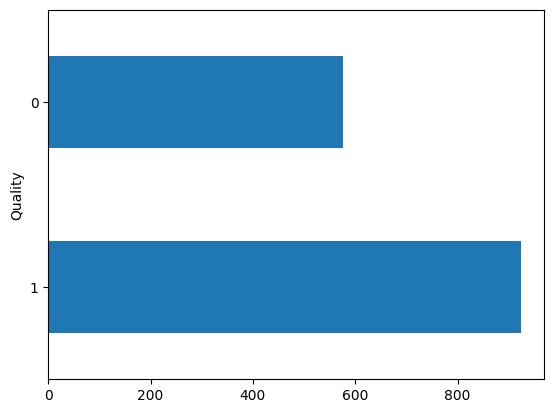

In [10]:
df_train.Quality.value_counts().plot.barh()
plt.show()

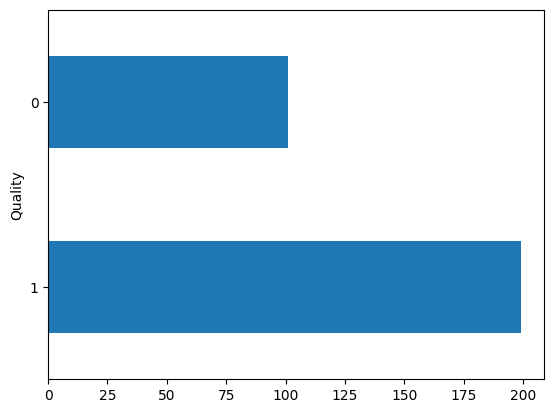

In [11]:
df_test.Quality.value_counts().plot.barh()
plt.show()

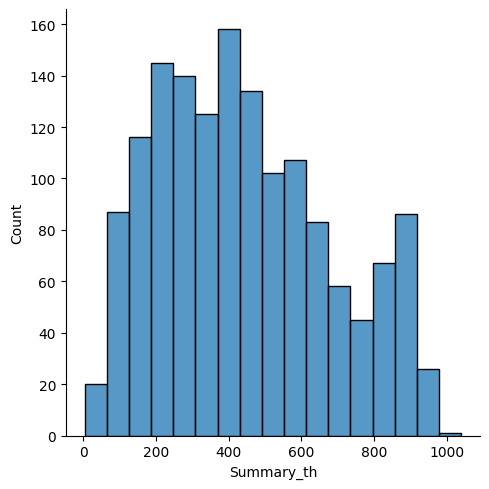

In [12]:
sns.displot(df_train.Summary_th.apply(len))

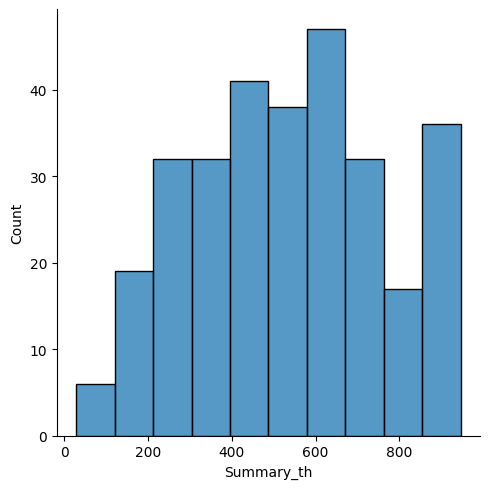

In [13]:
sns.displot(df_test.Summary_th.apply(len))

In [14]:
df_all_values = df_train.Quality.value_counts().to_frame()
df_all_values.columns = ['quality_train']
df_all_values['quality_test'] = df_test.Quality.value_counts()
df_all_values['percentage_train'] = df_all_values.quality_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.quality_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

,quality_train,quality_test,percentage_train,percentage_test
Quality,,,,
1,923,199,0.615333,0.663333
0,577,101,0.384667,0.336667


In [15]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

def get_text_str(message):
  tokenized =" "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized =tokenized + " " + j

  return tokenized


text = get_text_str(df_train.Summary_th)

In [16]:
!wget https://www.f0nt.com/download/sipafonts/THSarabunNew.zip ; unzip THSarabunNew.zip

--2024-06-24 07:31:42--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.f0nt.com/ [following]
--2024-06-24 07:31:44--  https://www.f0nt.com/
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip        [  <=>               ]  49.59K   238KB/s    in 0.2s    

2024-06-24 07:31:44 (238 KB/s) - ‘THSarabunNew.zip’ saved [50781]

Archive:  THSarabunNew.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find z

In [19]:
regexp = r"[ก-๙a-zA-Z']+"
path = 'THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path,
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=300,
                      max_words=1000,
                      colormap='plasma',
                      scale=3,
                      font_step=4,
                      contour_color='steelblue',
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

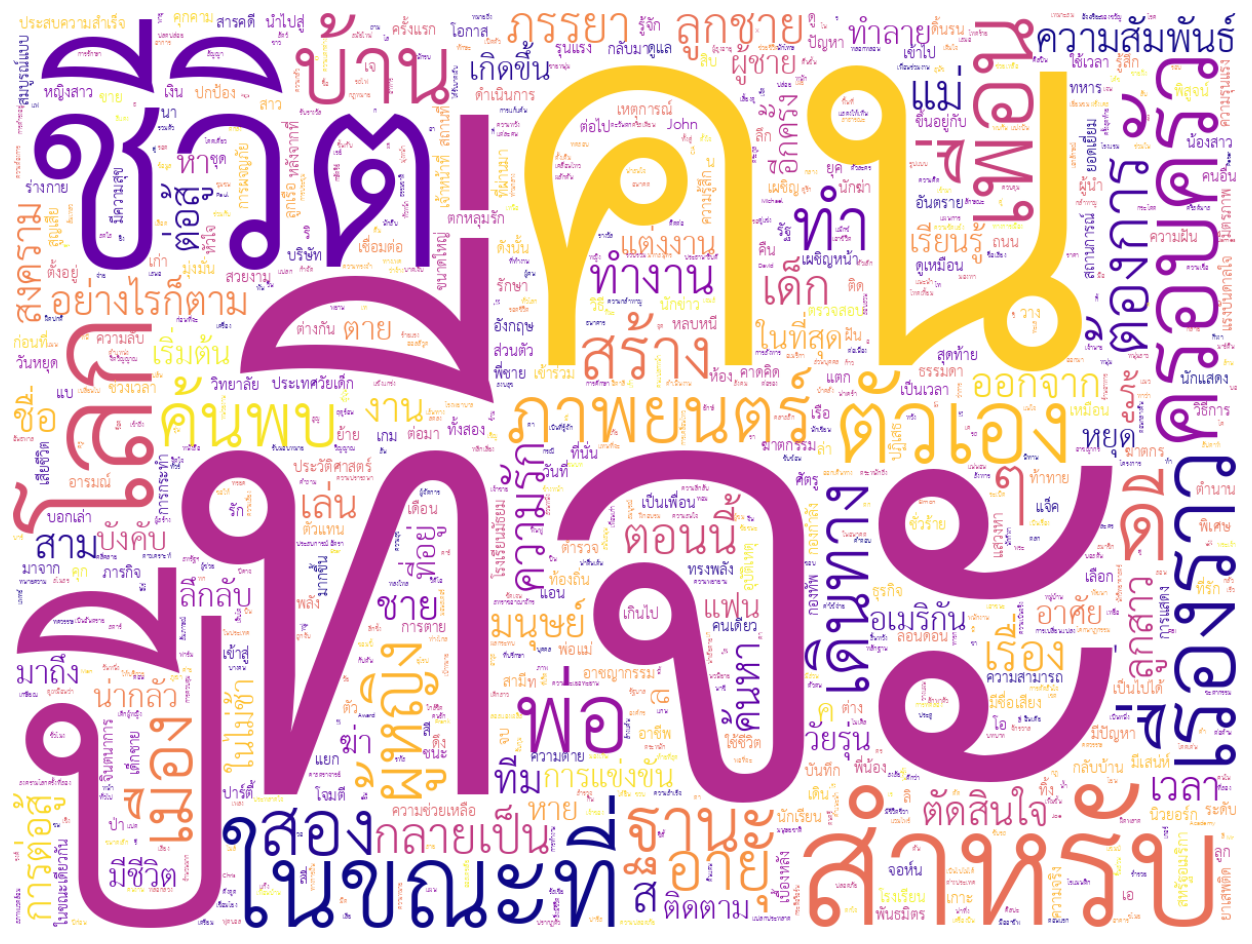

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# Text Clean

In [21]:
import re
import string
def clean_text(txt):


    # ลบ space
    txt = re.sub(r' ','',txt)

    #ลบ เลข
    txt = re.sub("(\d)", "",txt)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)

    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())

    return txt



df_train.Summary_th = df_train.Summary_th.apply(clean_text)
df_test.Summary_th = df_test.Summary_th.apply(clean_text)

In [22]:
print('dirty text: ',df_train.Summary_th[0])
print('clean text: ',clean_text(df_train.Summary_th[0]))

dirty text:  PattonOswaldแม้จะมีโศกนาฏกรรมส่วนตัวแต่ยังสร้างจุดเด่นที่ดีที่สุดของเขามุ่งเน้นไปที่ความยากลำบากของยุคที่ทรัมป์และชีวิตหลังจากการสูญเสียคนที่คุณรักPattonOswaldยังคงเดินทางสู่ความสุขสู่โลก
clean text:  PattonOswaldแม้จะมีโศกนาฏกรรมส่วนตัวแต่ยังสร้างจุดเด่นที่ดีที่สุดของเขามุ่งเน้นไปที่ความยากลำบากของยุคที่ทรัมป์และชีวิตหลังจากการสูญเสียคนที่คุณรักPattonOswaldยังคงเดินทางสู่ความสุขสู่โลก


# Feature Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pythainlp

tfidf_vec = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize,ngram_range=(1, 2))
tfidf = tfidf_vec.fit_transform(df_train.Summary_th).toarray()
tfidf_test = tfidf_vec.transform(df_test.Summary_th).toarray()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
print(tfidf.shape)
print(tfidf_test.shape)

(1500, 78804)
(300, 78804)


# Quality classification

In [25]:
import numpy as np
y = np.array(df_train.Quality) # turn train label into array
y_test = np.array(df_test.Quality) # turn test label into array

In [26]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0)
Lr.fit(tfidf, y)
y_pred = Lr.predict(tfidf_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.66
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       101
           1       0.66      0.99      0.79       199

    accuracy                           0.66       300
   macro avg       0.50      0.50      0.41       300
weighted avg       0.55      0.66      0.53       300



# Use additional data for classification

In [27]:
df_train.columns[12:]

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'Uncategorized', 'War', 'Western',
       'Quality'],
      dtype='object')

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1500 non-null   int64 
 1   Title           1500 non-null   object
 2   Year            1500 non-null   int64 
 3   Genres          1500 non-null   object
 4   IMDB ID         1500 non-null   object
 5   Runtime         1500 non-null   int64 
 6   Director        1500 non-null   object
 7   Writers         1489 non-null   object
 8   Cast            1485 non-null   object
 9   Summary_th      1500 non-null   object
 10  Rounded_rating  1500 non-null   int64 
 11  list_genres     1500 non-null   object
 12  Action          1500 non-null   int64 
 13  Adventure       1500 non-null   int64 
 14  Animation       1500 non-null   int64 
 15  Biography       1500 non-null   int64 
 16  Comedy          1500 non-null   int64 
 17  Crime           1500 non-null   int64 
 18  Document

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


ValueError: The name Quality occurs multiple times, use a level number

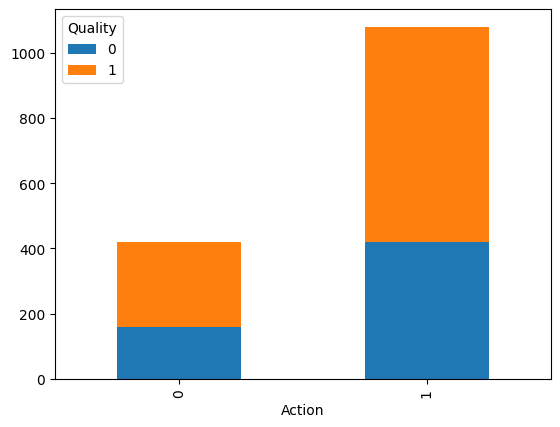

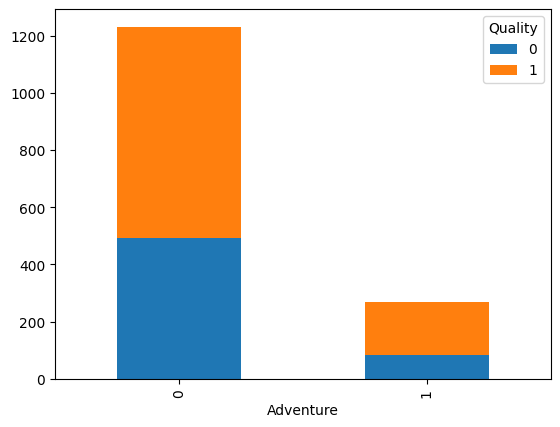

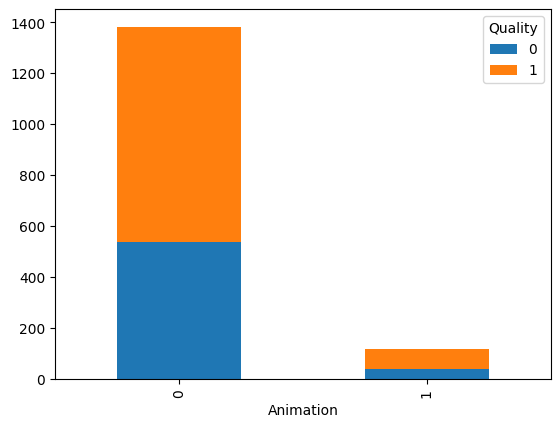

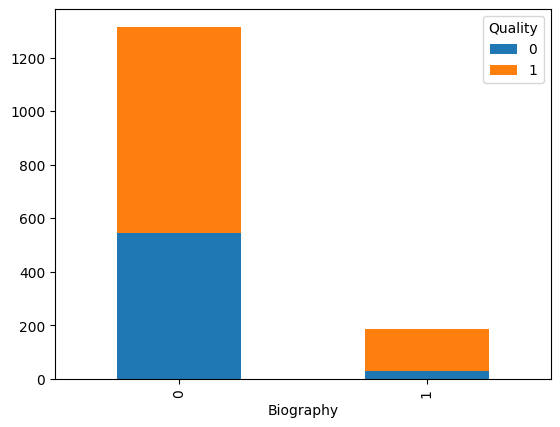

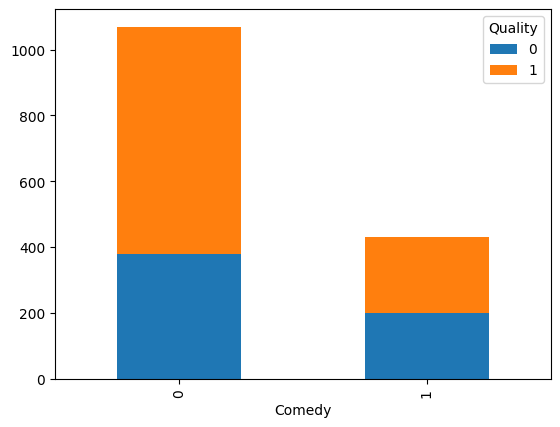

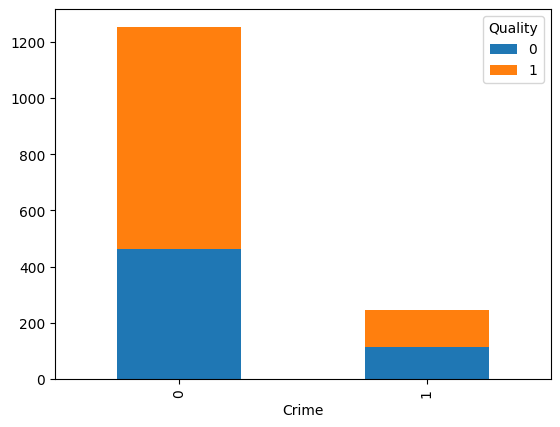

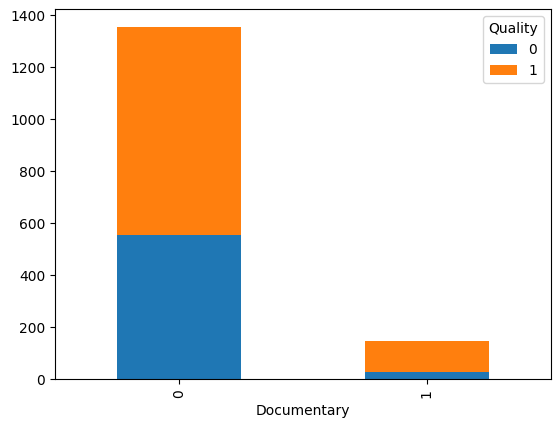

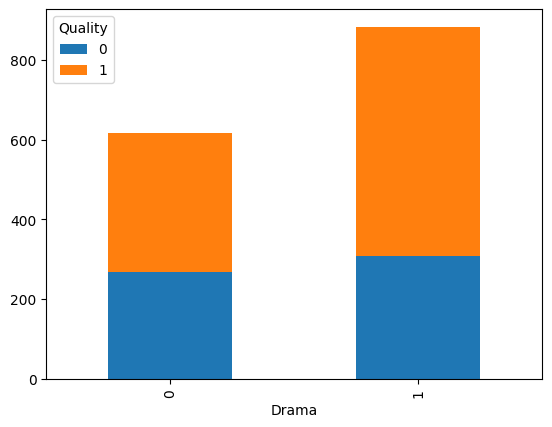

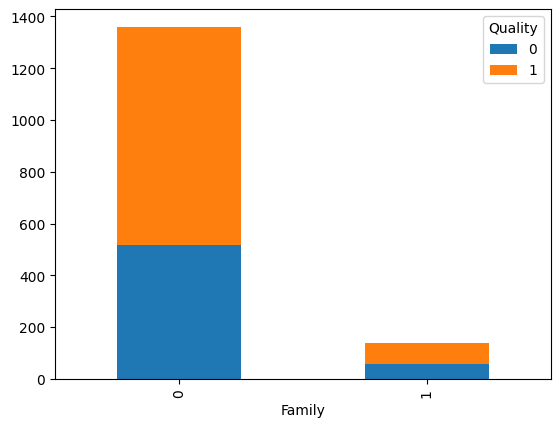

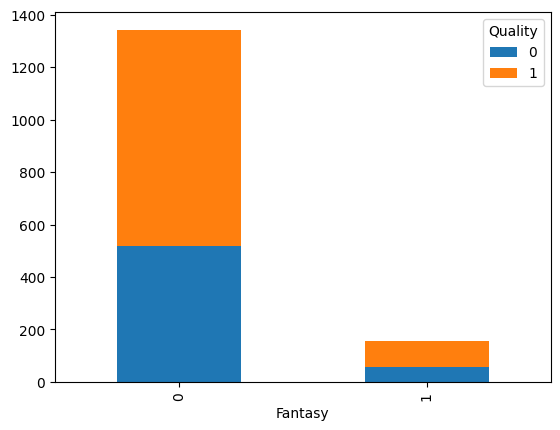

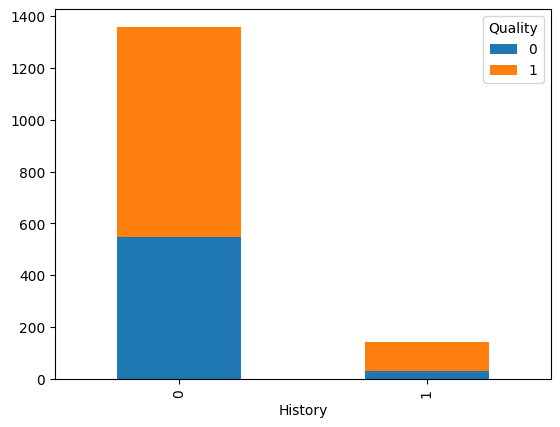

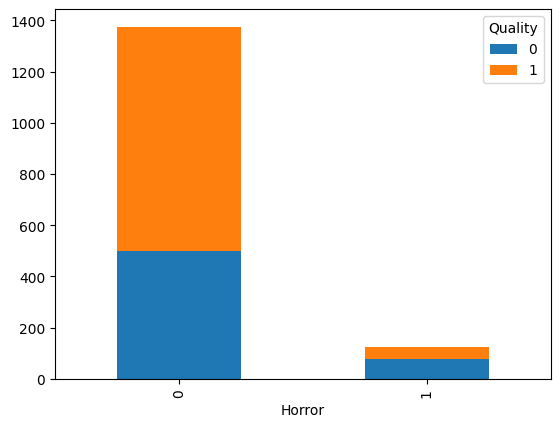

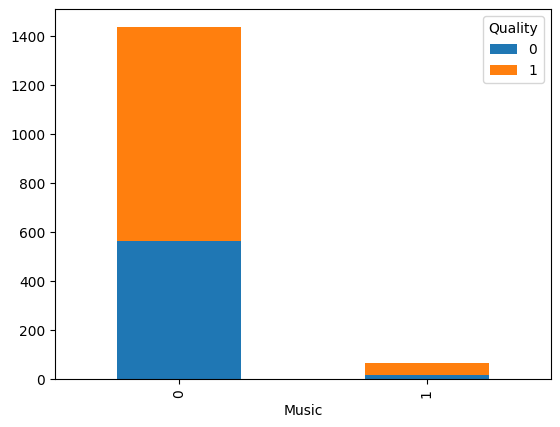

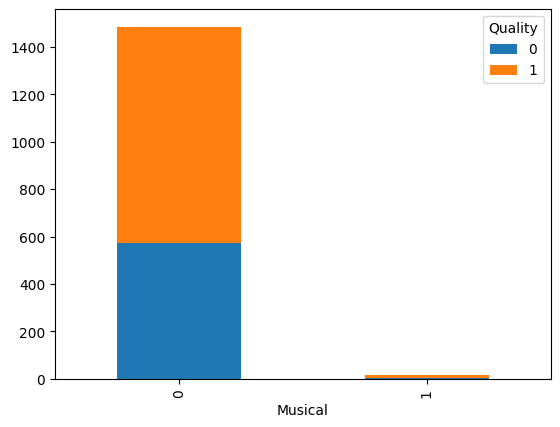

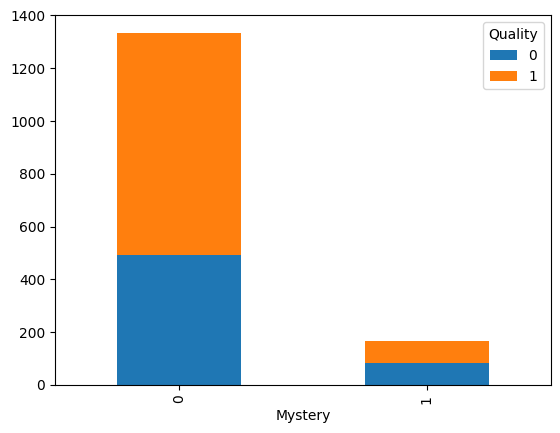

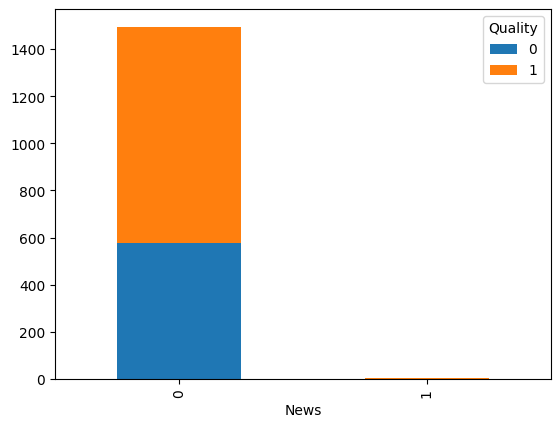

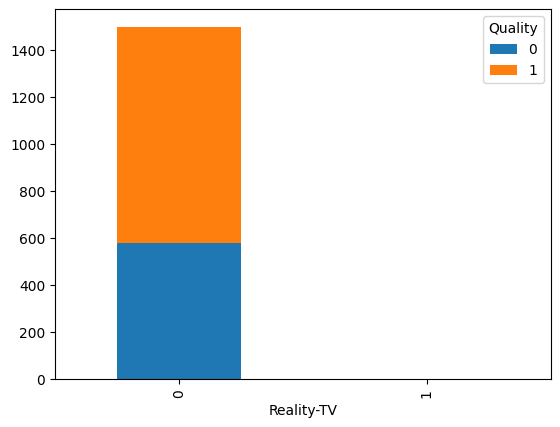

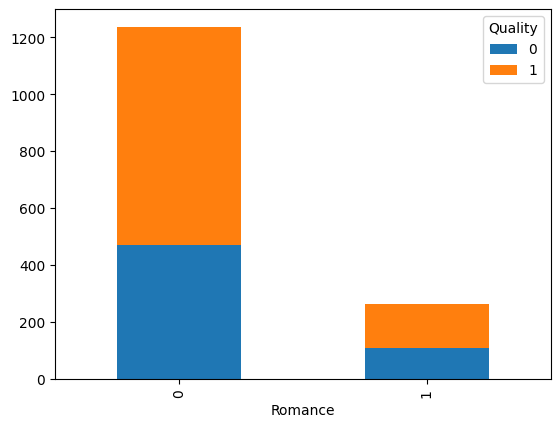

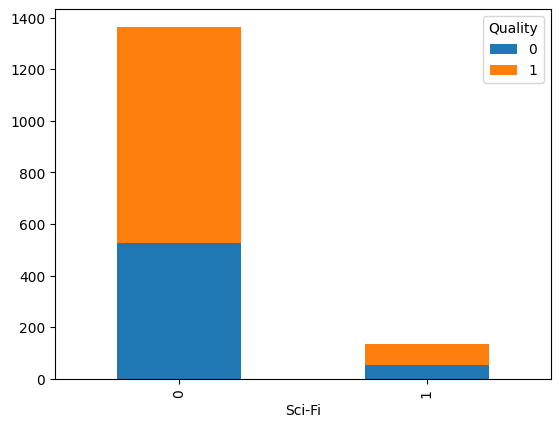

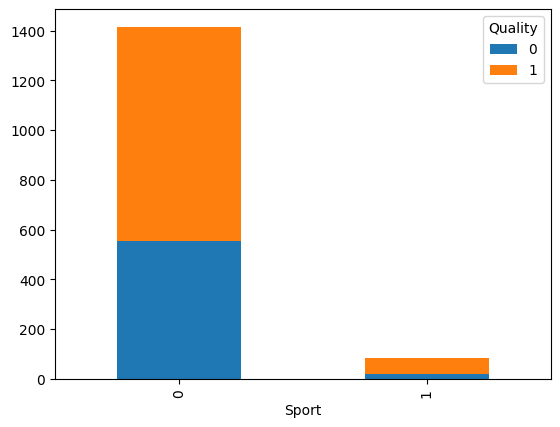

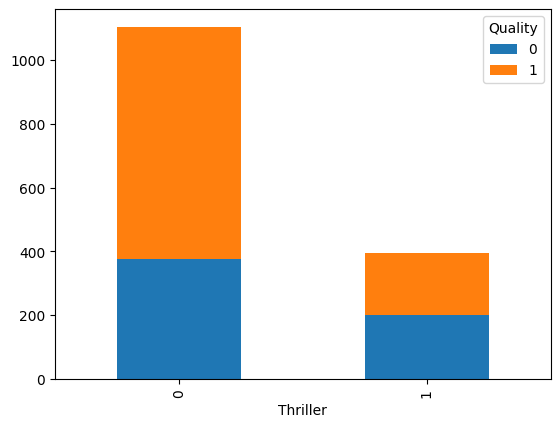

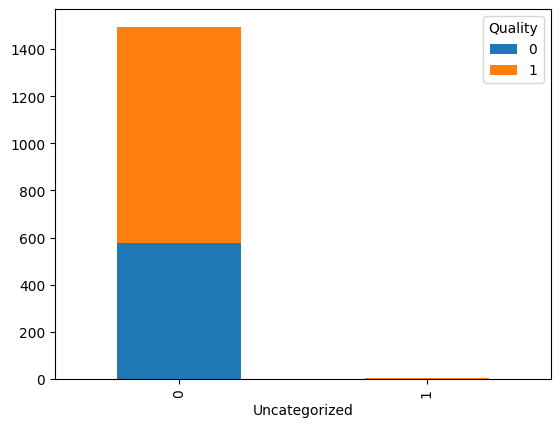

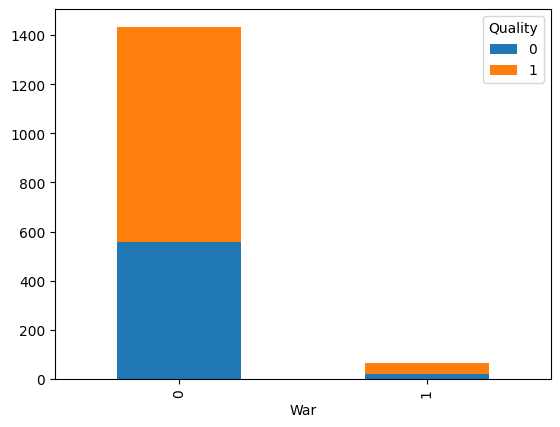

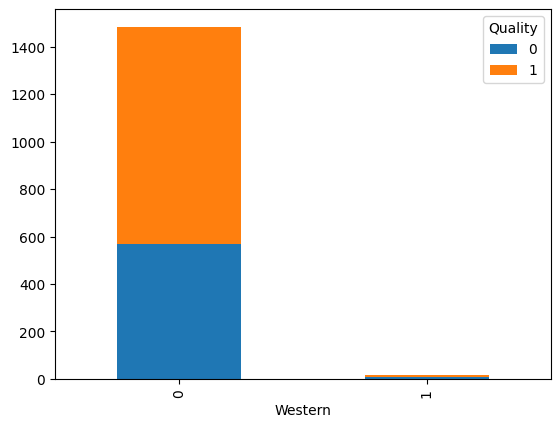

In [29]:
for i in df_train.columns[12:]:
  df2 = df_train.groupby([i, 'Quality'])[i].count().unstack('Quality').fillna(0)
  df2.plot(kind='bar', stacked=True)

<ipython-input-31-7948fb42c260>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train.Quality == 1 ].Runtime,label = 'Good')
<ipython-input-31-7948fb42c260>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train.Quality == 0 ].Runtime, label = 'Bad')


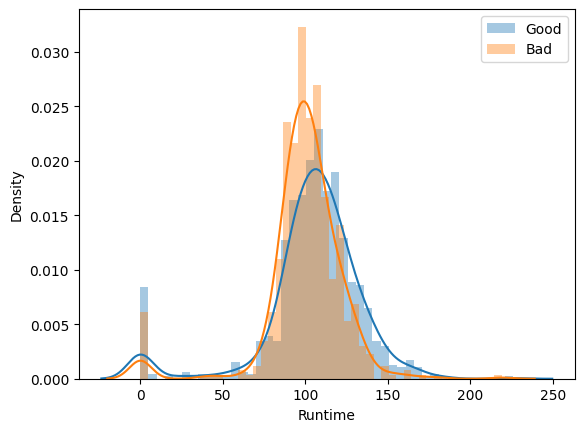

In [31]:
sns.distplot(df_train.loc[df_train.Quality == 1 ].Runtime,label = 'Good')
sns.distplot(df_train.loc[df_train.Quality == 0 ].Runtime, label = 'Bad')
plt.legend()

<Axes: xlabel='Year'>

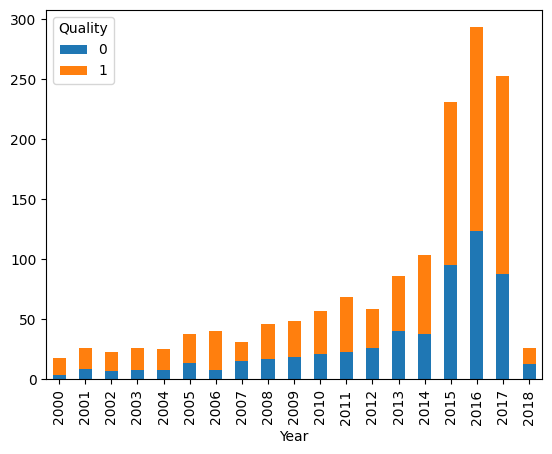

In [32]:
time_quality = df_train.groupby(['Year', 'Quality'])['Year'].count().unstack('Quality').fillna(0)
time_quality.plot(kind='bar', stacked=True)

<Axes: xlabel='Year'>

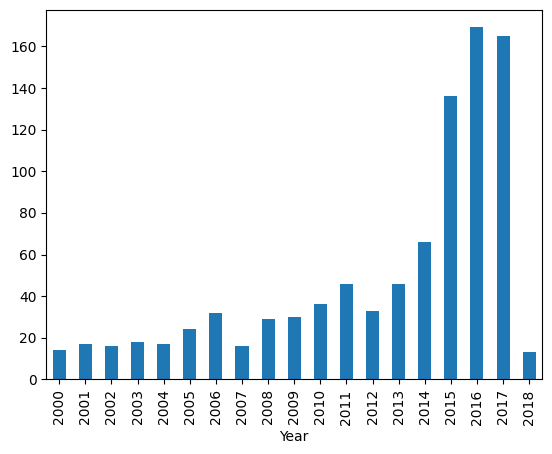

In [33]:

df_train.loc[df_train.Quality ==1].Year.value_counts().sort_index().plot.bar()
df_train.loc[df_train.Quality ==0].Year.value_counts().sort_index().plot.bar()

In [34]:
df_train.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Genres', 'IMDB ID', 'Runtime',
       'Director', 'Writers', 'Cast', 'Summary_th', 'Rounded_rating',
       'list_genres', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Uncategorized',
       'War', 'Western', 'Quality'],
      dtype='object')

In [35]:
df_train.Director = df_train.Director.astype('category')
df_train.Writers = df_train.Director.astype('category')

cat_columns = df_train.select_dtypes(['category']).columns
df_train[cat_columns] = df_train[cat_columns].apply(lambda x: x.cat.codes)

df_test.Director = df_test.Director.astype('category')
df_test.Writers = df_test.Director.astype('category')

cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

In [36]:
import numpy as np


add_col = ['Runtime','Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Uncategorized',
       'War', 'Western']

X_add= np.array(df_train[add_col])
X_add_test = np.array(df_test[add_col])

tfidf = np.column_stack((tfidf, X_add)) # combine as array
tfidf_test = np.column_stack((tfidf_test, X_add_test))

In [37]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0)
Lr.fit(tfidf, y)
y_pred = Lr.predict(tfidf_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.6533333333333333
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       101
           1       0.75      0.72      0.73       199

    accuracy                           0.65       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.66      0.65      0.66       300



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
